## OVERVIEW
---
* Data Visualization.
* Annual Income & Mall Spending Score Comparison by Gender Class. 
* Andrew Curves
* Elbow Method
* KMeans Clustering and Hierarchical Clustering

In [82]:
#VIZ LIBRARY
import pandas as pd
from pandas import plotting
import numpy as np
from tqdm.notebook import tqdm as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Preprocessing
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

#CLASSICAL STATS
import scipy
import statsmodels
import statsmodels.api as sm


import warnings 
warnings.filterwarnings('ignore')

In [2]:
#get the data
df = pd.read_csv('data/mall_data.csv')

## DATA BASIC INFORMATION
---

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#check feature data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#basic stats info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* The minimum annual income is 15k and 137k as the maximum!

In [8]:
print('Dataset Shape: ', df.shape)

Dataset Shape:  (200, 5)


In [13]:
df.drop('CustomerID', axis=1).groupby('Gender').describe().T

Gender                            Female        Male
Age                    count  112.000000   88.000000
                       mean    38.098214   39.806818
                       std     12.644095   15.514812
                       min     18.000000   18.000000
                       25%     29.000000   27.750000
                       50%     35.000000   37.000000
                       75%     47.500000   50.500000
                       max     68.000000   70.000000
Annual Income (k$)     count  112.000000   88.000000
                       mean    59.250000   62.227273
                       std     26.011952   26.638373
                       min     16.000000   15.000000
                       25%     39.750000   45.500000
                       50%     60.000000   62.500000
                       75%     77.250000   78.000000
                       max    126.000000  137.000000
Spending Score (1-100) count  112.000000   88.000000
                       mean    51.526786   48.511364
                       std     24.114950   27.896770
                       min      5.000000    1.000000
                       25%     35.000000   24.500000
                       50%     50.000000   50.000000
                       75%     73.000000   70.000000
                       max     99.000000   97.000000

#### CHECKING IF THERE'S A NULL DATA

In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
#No null data

## EDA
---

Text(0.5, 1.0, 'Gender Andrew Curves')

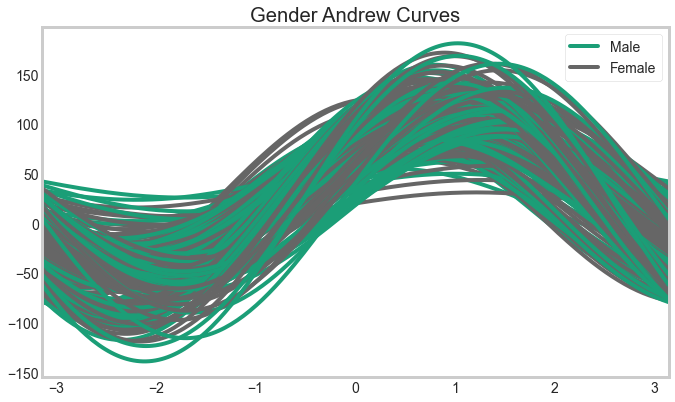

In [7]:
plt.figure(figsize=(10,6))
plotting.andrews_curves(df.drop('CustomerID', axis=1), 'Gender', colormap='Dark2')
plt.title('Gender Andrew Curves')

* From the plot above, We can easily note that the lines that represent samples from the Gender class have similar curves.

### DISTRIBUTION OF ANNUAL INCOME, AGE & SPENDING SCORE
---

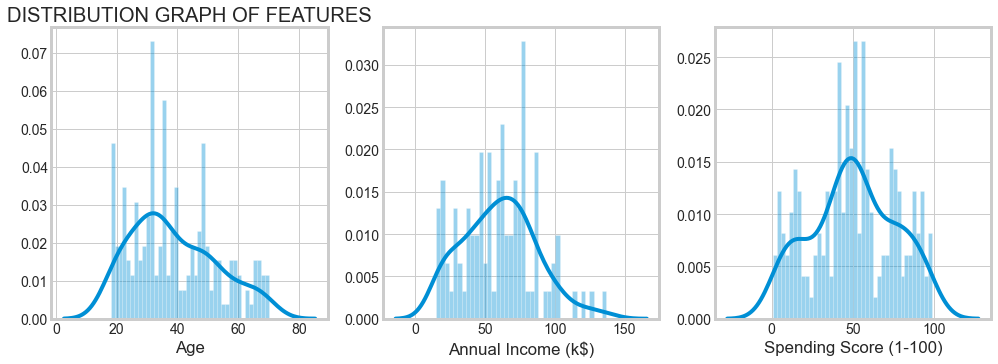

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].set_title('DISTRIBUTION GRAPH OF FEATURES')

sns.distplot(df['Age'], bins=40, ax=ax[0])
sns.distplot(df['Annual Income (k$)'], bins=40, ax=ax[1])
sns.distplot(df['Spending Score (1-100)'], bins=40, ax=ax[2])

### INSIGHTS
---
* From the plot above, we can say that most of the people have an earning of around 50k-75k US Dollars. 
* The most regular customers for the Mall are age around 20-40 years of age. 
* Most of the Customers have their Spending Score in the range of 40-60.

In [9]:
#add range feature
df['age_range'] = pd.cut(df['Age'], [10,20,30,40,50,60,80]).values
df['AnnIn_range'] = pd.cut(df['Annual Income (k$)'], [i*10 for i in range(15)]).values
df['spend_score_range'] = pd.cut(df['Spending Score (1-100)'], [0,20,40,60,80,100])

#### BAR DISTRIBUTION PLOT OF FEATURES

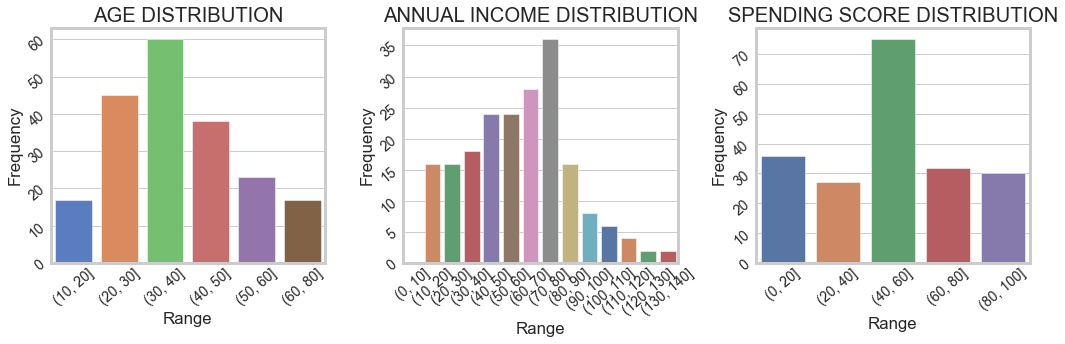

In [16]:

fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.barplot(x=df.groupby('age_range').count().index, y=df.groupby('age_range').count()['Age'], ax=ax[0], palette='muted')
sns.barplot(x=df.groupby('AnnIn_range').count().index, y=df.groupby('AnnIn_range').count()['Annual Income (k$)'], ax=ax[1], palette='deep')
sns.barplot(x=df.groupby('spend_score_range').count().index, y=df.groupby('spend_score_range').count()['Spending Score (1-100)'], ax=ax[2], palette='deep')

plt.setp(ax, ylabel='Frequency', xlabel='Range')
ax[0].set_title('AGE DISTRIBUTION')
ax[1].set_title('ANNUAL INCOME DISTRIBUTION')
ax[2].set_title('SPENDING SCORE DISTRIBUTION')

for ax in fig.axes:
    ax.tick_params(labelrotation=40)

fig.tight_layout()

### INSIGHTS
---
* Here we can visualize properly the distribition per features
* It can be seen that the Ages from 20 to 49 are very much frequent but there is no clear pattern
* If we take a look at Spending Score Distribution, we may conclude that most of the Customers have their Spending Score in the range of 40-60.

Text(0.5, 1.0, 'ANNUAL INCOME vs AGE')

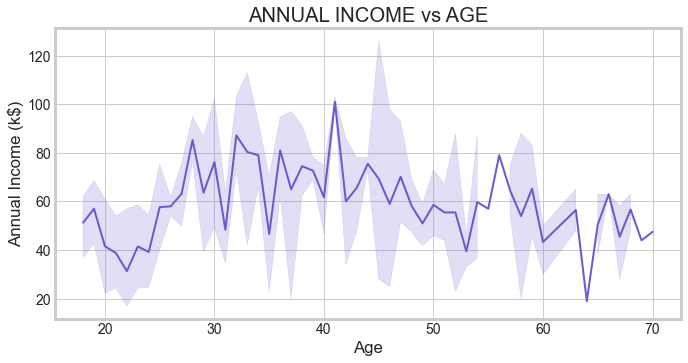

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Age'], y=df['Annual Income (k$)'], color='slateblue', lw=2)
plt.title('ANNUAL INCOME vs AGE')

### INSIGHTS
---
* In the plt above, we can see the relationship between age and annual income.
* There is no definite pattern, but we can clearly say that Age 25-45 yrs old have higher income rate. 

Text(0.5, 1.0, 'ANNUAL INCOME vs AGE')

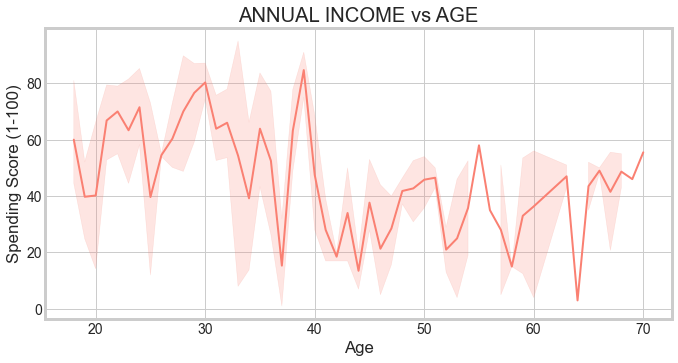

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Age'], y=df['Spending Score (1-100)'], color='salmon', lw=2)
plt.title('ANNUAL INCOME vs AGE')

* Age 20-40 years old, tend to have higher spending score.

### ANALYSIS BY GENDER
---

#### ANNUAL INCOME COMPARISON BY GENDER

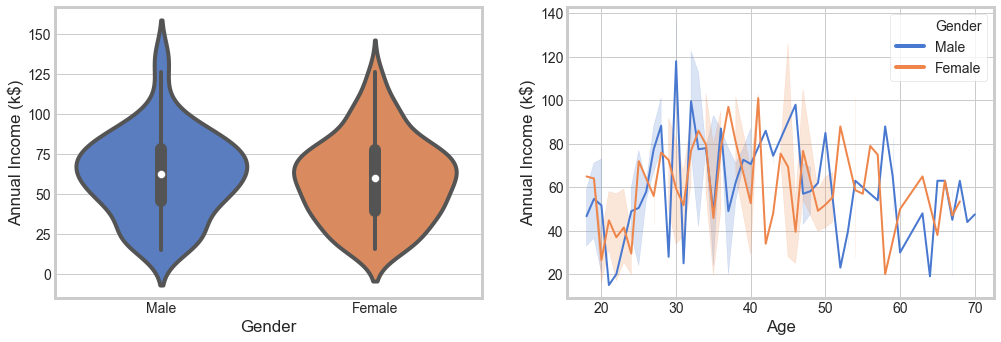

In [49]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.violinplot(x=df['Gender'], y=df['Annual Income (k$)'], ax=ax[0], palette='muted')
sns.lineplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Gender'], ax=ax[1], palette='muted', lw=2)

### INSIGHTS
---
* There are more number of males who get paid more than females.
* But, The number of males and females are equal in number when it comes to low annual income.

#### SPENDING SCORE COMPARISON BY GENDER

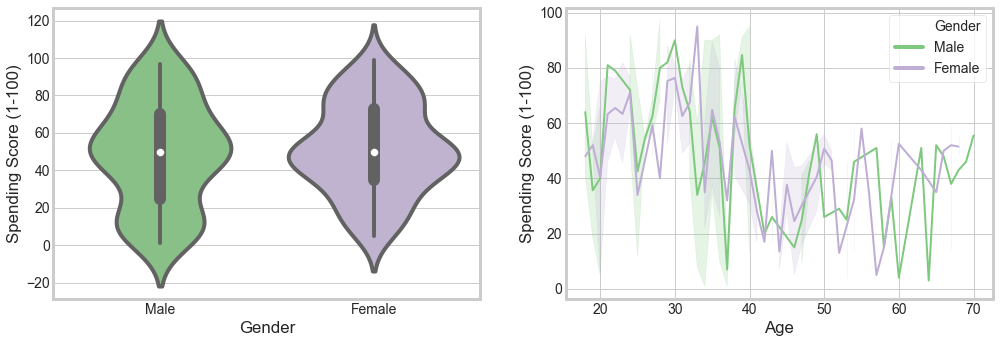

In [50]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.violinplot(x=df['Gender'], y=df['Spending Score (1-100)'], ax=ax[0], palette='Accent')
sns.lineplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Gender'], ax=ax[1], palette='Accent', lw=2)

### INSIGHTS
---
* Most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars.
* Females have a spending score of around 35k US Dollars to 75k US Dollars.
* We can clearly say that women are shopping leaders.

## CLUSTERING
---

In [51]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

#### ELBOW METHOD (FINDING THE BEST NUMBER OF CLUSTERS)

Text(0, 0.5, 'WCSS')

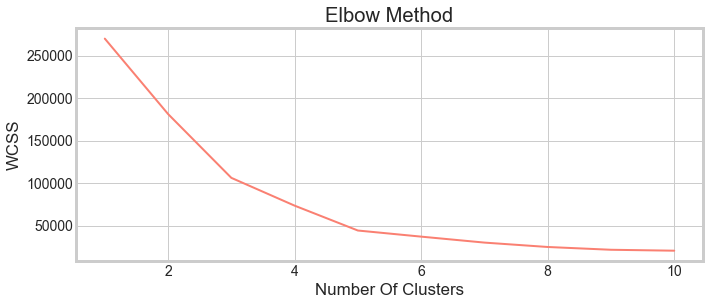

In [57]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,4))
sns.lineplot(range(1,11), wcss, lw=2, color='salmon')
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')

* At the plot above, we can say that the best number of clusters is 5.

### KMEANS CLUSTERING
---

In [58]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
clusters = km.fit_predict(X)

Text(0, 0.5, 'SPENDING SCORE')

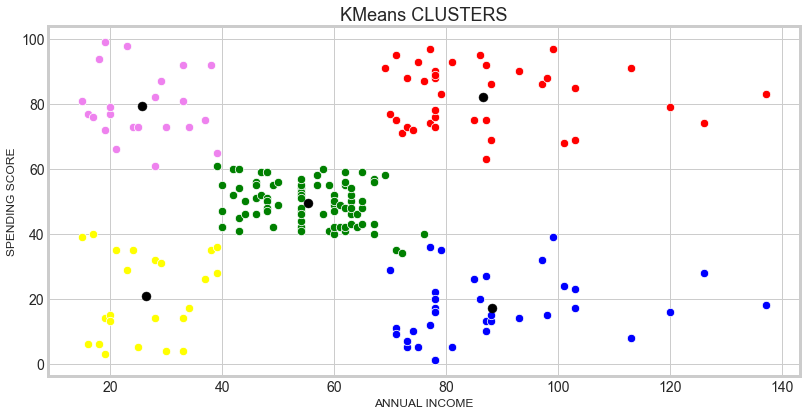

In [65]:
color = ['blue', 'green', 'red', 'violet', 'yellow']
plt.figure(figsize=(12,6))

for i in range(0,5):
    sns.scatterplot(x = X[clusters ==i,0], y = X[clusters==i,1], s=70, color=color[i])

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 80, c = 'black' , label = 'centeroid')
plt.title('KMeans CLUSTERS', fontsize=18)
plt.xlabel('ANNUAL INCOME',fontsize=12)
plt.ylabel('SPENDING SCORE', fontsize=12)

### INSIGHT
---
* There are clearly Five segments of Customers, based on their Annual Income and Spending Score which are reportedly the best factors to determine the segments of a customer in a Mall.

### HIERARCHIAL CLUSTERING
---

Text(0, 0.5, 'SPENDING SCORE')

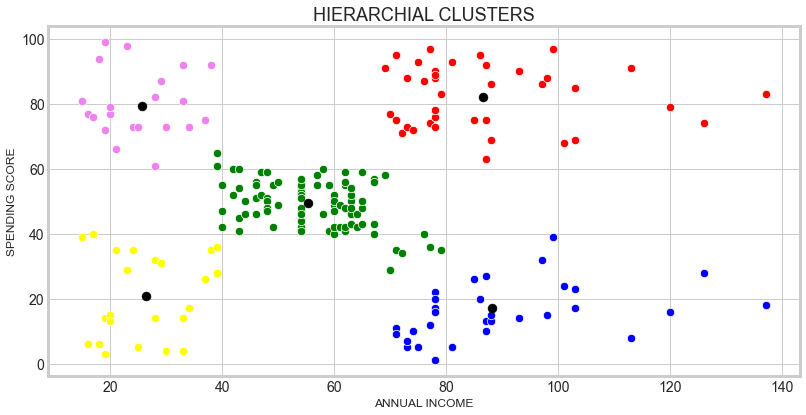

In [69]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
h_clusters = hc.fit_predict(X)
plt.figure(figsize=(12,6))

for i in range(0,5):
    sns.scatterplot(x= X[h_clusters==i,0], y= X[h_clusters==i,1], color=color[i], s=70)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 80, c = 'black' , label = 'centeroid')

plt.title('HIERARCHIAL CLUSTERS', fontsize=18)
plt.xlabel('ANNUAL INCOME',fontsize=12)
plt.ylabel('SPENDING SCORE', fontsize=12)

### CLUESTERING BY AGE AND SPENDING SCORE
---

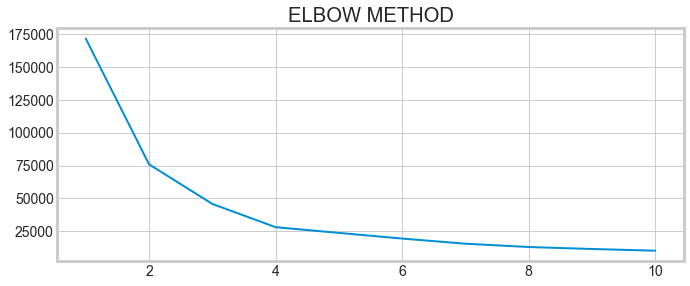

In [80]:
X = df[['Age', 'Spending Score (1-100)']].values
wcss = []

plt.figure(figsize=(10,4))
plt.title('ELBOW METHOD')

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss, lw=2)

* At the plot above, we can say that the best number of clusters is 4


Text(0, 0.5, 'Spending Score')

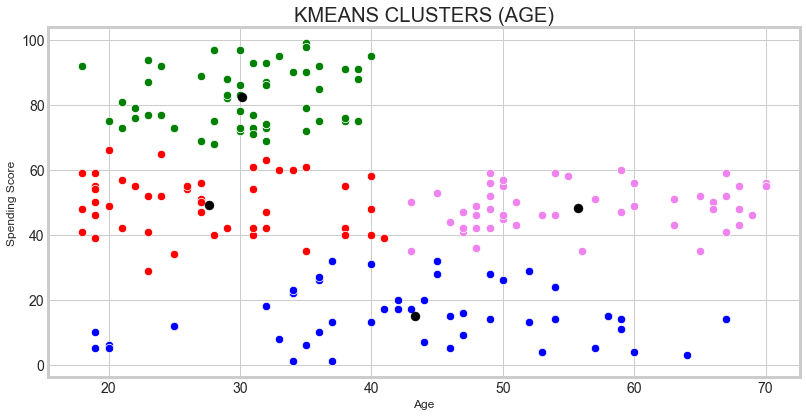

In [81]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
clusters = km.fit_predict(X)
plt.figure(figsize=(12,6))

for i in range(0,4):
    sns.scatterplot(x=X[clusters==i,0], y= X[clusters==i,1], color=color[i], s=70)

plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], c='black', s=80)
    
plt.title('KMEANS CLUSTERS (AGE)')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)

### INSIGHT
---
* Based on Age and Spending Score, There are 4 segments that can determine mall customer.